<a href="https://colab.research.google.com/github/CamposJoao/applied-computational-intelligence/blob/main/HomeWork2_ICA_rev00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2 - Modelos de Regressão para Horas de Treinamento para Candidatos a Mudança de Emprego

Thaís C. Sampaio, João Pedro Campos

Departamento de Engenharia de Teleinformática

Universidade Federal do Ceará, Fortaleza, Brasil

Emails: {thaisc, joaopedroscampos\}@alu.ufc.br}

## Objetivo

Objetivo é o estudo e implementação de modelos de regressão para horas de treinamento utilizando o dataset do kaggle chamado HR Analytics: Job Change of Data Scientists

## Ambiente para trabalho

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, linear_model
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import yeojohnson

###Montagem do Drive para acessar o dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Acesso ao banco de dados de treino e de teste 

In [ ]:
pd.read_csv('/content/drive/MyDrive/ICA/aug_train.csv').shape

(19158, 14)

In [ ]:
pd.read_csv('/content/drive/MyDrive/ICA/aug_test.csv').shape

(2129, 13)

### Unificação dos dados

In [ ]:
df = pd.concat([pd.read_csv('/content/drive/MyDrive/ICA/aug_test.csv'), pd.read_csv('/content/drive/MyDrive/ICA/aug_train.csv')])
df.shape

(21287, 14)

In [ ]:
data = df.drop(columns=['gender','target'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21287 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   relevent_experience     21287 non-null  object 
 4   enrolled_university     20870 non-null  object 
 5   education_level         20775 non-null  object 
 6   major_discipline        18162 non-null  object 
 7   experience              21217 non-null  object 
 8   company_size            14727 non-null  object 
 9   company_type            14513 non-null  object 
 10  last_new_job            20824 non-null  object 
 11  training_hours          21287 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 2.1+ MB


### Substituição dos dados categóricos por escala numérica (variáveis do tipo string para tipo float)

In [ ]:
data['relevent_experience'].replace({'No relevent experience': 0}, inplace=True)
data['relevent_experience'].replace({'Has relevent experience': 1}, inplace=True)

In [ ]:
data['enrolled_university'].replace({'no_enrollment': 0}, inplace=True)
data['enrolled_university'].replace({'Part time course': 1}, inplace=True)
data['enrolled_university'].replace({'Full time course': 2}, inplace=True)

In [ ]:
data['last_new_job'].replace({'never': 0}, inplace=True)
data['last_new_job'].replace({'1': 1}, inplace=True)
data['last_new_job'].replace({'2': 2}, inplace=True)
data['last_new_job'].replace({'3': 3}, inplace=True)
data['last_new_job'].replace({'4': 4}, inplace=True)
data['last_new_job'].replace({'>4': 5}, inplace=True)

In [ ]:
data['education_level'].replace({'Primary School': 0}, inplace=True)
data['education_level'].replace({'High School': 1}, inplace=True)
data['education_level'].replace({'Graduate': 2}, inplace=True)
data['education_level'].replace({'Masters': 3}, inplace=True)
data['education_level'].replace({'Phd': 4}, inplace=True)

In [ ]:
data['company_type'].fillna('Unknown',inplace=True)
data['company_type'].replace({'Unknown': 0}, inplace=True)
data['company_type'].replace({'Other': 1}, inplace=True)
data['company_type'].replace({'Pvt Ltd': 2}, inplace=True)
data['company_type'].replace({'Early Stage Startup': 3}, inplace=True)
data['company_type'].replace({'Funded Startup': 4}, inplace=True)
data['company_type'].replace({'Public Sector': 5}, inplace=True)
data['company_type'].replace({'NGO': 6}, inplace=True)

In [ ]:
data['company_size'].fillna('Unknown',inplace=True)
data['company_size'].replace({'Unknown': 0}, inplace=True)
data['company_size'].replace({'<10': 1}, inplace=True)
data['company_size'].replace({'10/49': 2}, inplace=True)
data['company_size'].replace({'50-99': 3}, inplace=True)
data['company_size'].replace({'100-500': 4}, inplace=True)
data['company_size'].replace({'500-999': 5}, inplace=True)
data['company_size'].replace({'1000-4999': 6}, inplace=True)
data['company_size'].replace({'5000-9999': 7}, inplace=True)
data['company_size'].replace({'10000+': 8}, inplace=True)

In [ ]:
data['major_discipline'].fillna('Unknown',inplace=True)
data['major_discipline'].replace({'Unknown': 0}, inplace=True)
data['major_discipline'].replace({'No Major': 1}, inplace=True)
data['major_discipline'].replace({'Arts': 2}, inplace=True)
data['major_discipline'].replace({'Humanities': 3}, inplace=True)
data['major_discipline'].replace({'Business Degree': 4}, inplace=True)
data['major_discipline'].replace({'STEM': 5}, inplace=True)
data['major_discipline'].replace({'Other': 6}, inplace=True)

In [ ]:
data['experience'].replace({'<1': 0}, inplace=True)
data['experience'].replace({'1': 1}, inplace=True)
data['experience'].replace({'2': 2}, inplace=True)
data['experience'].replace({'3': 3}, inplace=True)
data['experience'].replace({'4': 4}, inplace=True)
data['experience'].replace({'5': 5}, inplace=True)
data['experience'].replace({'6': 6}, inplace=True)
data['experience'].replace({'7': 7}, inplace=True)
data['experience'].replace({'8': 8}, inplace=True)
data['experience'].replace({'9': 9}, inplace=True)
data['experience'].replace({'10': 10}, inplace=True)
data['experience'].replace({'11': 11}, inplace=True)
data['experience'].replace({'12': 12}, inplace=True)
data['experience'].replace({'13': 13}, inplace=True)
data['experience'].replace({'14': 14}, inplace=True)
data['experience'].replace({'15': 15}, inplace=True)
data['experience'].replace({'16': 16}, inplace=True)
data['experience'].replace({'17': 17}, inplace=True)
data['experience'].replace({'18': 18}, inplace=True)
data['experience'].replace({'19': 19}, inplace=True)
data['experience'].replace({'20': 20}, inplace=True)
data['experience'].replace({'>20': 21}, inplace=True)

In [ ]:
# Codificando o preditor (entrada) city utilizando a biblioteca label encoder
le = preprocessing.LabelEncoder()
data['city'] = le.fit_transform(data['city'])

### Eliminando os elementos faltantes

In [ ]:
# Excluindo as observações N com dados faltantes e salvando os dados em uma nova variável:
dataframe = data.dropna()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20032 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             20032 non-null  int64  
 1   city                    20032 non-null  int64  
 2   city_development_index  20032 non-null  float64
 3   relevent_experience     20032 non-null  int64  
 4   enrolled_university     20032 non-null  float64
 5   education_level         20032 non-null  float64
 6   major_discipline        20032 non-null  int64  
 7   experience              20032 non-null  float64
 8   company_size            20032 non-null  int64  
 9   company_type            20032 non-null  int64  
 10  last_new_job            20032 non-null  float64
 11  training_hours          20032 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 2.0 MB


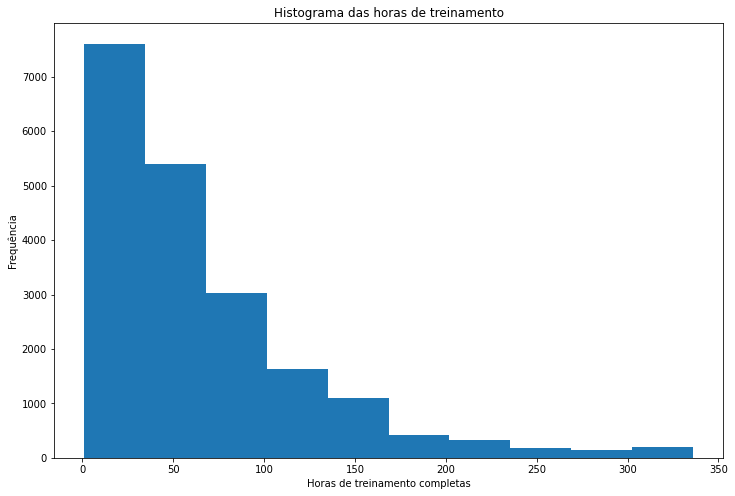

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Histograma das horas de treinamento')
plt.hist(dataframe['training_hours'])
plt.ylabel('Frequência')
plt.xlabel('Horas de treinamento completas')
plt.savefig('horastreinamento.pdf')

### Pré-processamento

In [ ]:
# Computanto a média, o desvio padrão e a obliquidade (skewness) do conjunto de dados:
unc_monovar = dataframe.describe().iloc[1:3,1:].append(dataframe.skew()[1:], ignore_index=True)
unc_monovar.index = ['Média','Desvio padrão','Obliquidade']
display(unc_monovar.T)

,Média,Desvio padrão,Obliquidade
city,43.967851,35.478183,0.407048
city_development_index,0.831290,0.122314,-1.037871
relevent_experience,0.731330,0.443279,-1.043825
enrolled_university,0.456270,0.799995,1.291069
education_level,2.141973,0.689908,-0.076953
major_discipline,4.226338,1.724523,-1.841350
experience,10.279353,6.769513,0.377661
company_size,3.011831,2.677144,0.476299
company_type,1.792682,1.524532,0.748344
last_new_job,2.027356,1.671263,0.786192


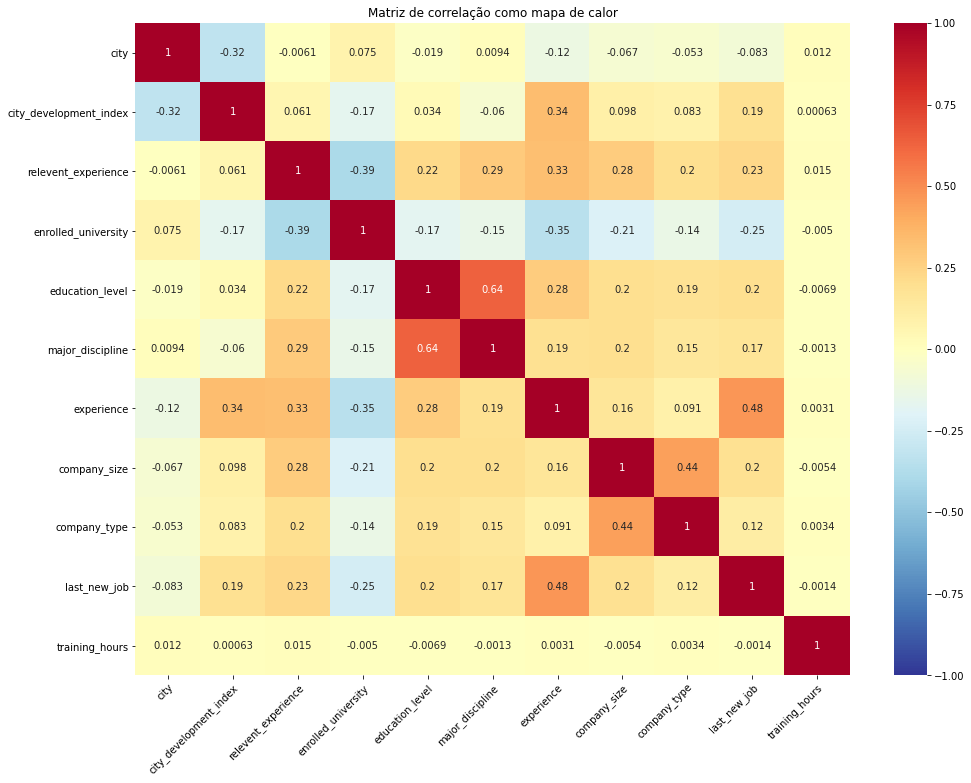

In [ ]:
# Salvando os dados em uma nova variável para calculo da correlação entre pares de preditores e entre preditores e a saída:
dftrainpredictors = dataframe.drop(columns=['enrollee_id'])
# Calculo da matriz de correlação dos dados:
data_pair_corr = dftrainpredictors.corr()
# Visualização da matriz de correlação como mapa de calor:
fig, ax = plt.subplots(figsize=(16,12))         # Tamanho da figura
ax = sns.heatmap(data_pair_corr, annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1)
ax.set_title('Matriz de correlação como mapa de calor')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.savefig('matriz_correlacao_pares.pdf')
plt.show()

#### Divisão em entrada x e saída y

Separando a variável dependente (saída) e as variáveis independentes (entradas)

In [ ]:
# Escolhendo as variáveis independentes
x = dataframe[['city', 'city_development_index', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']]

In [ ]:
# Variável dependente
y = dataframe[['training_hours']]

#### Transformação dos dados

In [ ]:
def conserta_skewness(x):
    # Conserta a obliquidade (assimetria) de um vetor de uma dimensão x usando a família de transformação Yeo-Johnson.
    return yeojohnson(x)[0]

# Consertando a assimetria dos dados:
x_simetrico = x.apply(conserta_skewness)

#### Centrar e escalonar
Para construir nosso modelo de regressão sem enviesamento precisamos centrar e escalonar os dados subtraindo a média e dividindo o resultado pelo desvio padrão com assunção que os dados tem distribuição gaussiana

In [ ]:
# Centrando e escalonando os dados (com média zero e variância unitária):
scaled_x = x_simetrico.iloc[:,:]
scaled_x = (scaled_x - scaled_x.mean())/scaled_x.std()

#### Divisão em treino e teste
Para construir nosso modelo de regressão precisamos dividir os dados em duas partes. Uma para treinar o modelo e outra para testar o modelo com dados que ele não conhece. Para isso iremos separar 80% dos dados para treino e 20% dos dados para teste através da biblioteca train_test_split que faz essa separação automaticamente.

**x_treino** é a parte usada para treinar o algoritmo

**x_teste** é a parte usada para testar o algoritmo depois de treinado

**y_treino** é a parte das respostas usadas no treino

**y_teste** é a parte das respostas usadas para testar o algoritmo

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(scaled_x, y, test_size=0.2)

## Tarefa 0

## Tarefa 1 - Regressão Linear Múltipla

### Treinando o Modelo

In [ ]:
# Define um modelo de regressão
modelo_ols = linear_model.LinearRegression()

# Treina o modelo com os dados de treino
modelo_ols.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predição da Saída

In [ ]:
# y_predito contém a previsão das horas de treinamento (training_hours) do nosso modelo
y_predito_ols = modelo_ols.predict(x_teste)

### Avaliação do modelo

Para saber o quanto o nosso modelo está explicando os dados, ou o quanto o modelo pode prever corretamente, iremos utilizar a medida R2, que é o coeficiente de determinação e o cálculo dos resíduos através da função custo (RMSE). Para isso iremos utilizar os dados da resposta na etapa de teste e os dados de resposta previstos.

In [ ]:
# Calculo do RMSE e da pontuação R2 usando as funções do scikit-learn 
print('RMSE: ', np.sqrt(mean_squared_error(y_teste, y_predito_ols)))
print('Medida R2: ', r2_score(y_teste, y_predito_ols))

RMSE:  60.76506410067485
Medida R2:  -0.0014585864568672502


Quanto mais próximo de 1 o valor de R2, mais o modelo é capaz de prever corretamente.

In [ ]:
# Validação cruzada considerando k = 10 (10 dobras ou 10 pastas)
modelo_ols_cv_r2 = cross_val_score(modelo_ols, x_treino, y_treino, cv=10)
modelo_ols_cv_rmse = cross_val_score(modelo_ols, x_treino, y_treino, scoring='neg_mean_squared_error',cv=10)
modelo_ols_cv_rmse = np.sqrt(-modelo_ols_cv_rmse)
print('RMSE para k = 10: ', modelo_ols_cv_rmse)
print('Medida R2 para k = 10: ', modelo_ols_cv_r2)

RMSE para k = 10:  [58.97413037 60.39159107 64.31619612 59.50012787 58.33282953 59.95203572
 59.45734341 57.57732514 58.23170685 62.52553815]
Medida R2 para k = 10:  [-0.00046815 -0.00269932 -0.00374002 -0.00141121 -0.00335118 -0.00340081
  0.00170884 -0.0051633  -0.00103235 -0.00085868]


## Tarefa 2 - Regressão Linear Múltipla com Penalização (L2 - Ridge)

### Treinando o modelo

In [ ]:
# Define um modelo de regressão com default lambda = 1 
modelo_ridge = linear_model.Ridge()

# Treina o modelo com os dados de treino
modelo_ridge.fit(x_treino, y_treino)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Predição da saída

In [ ]:
# y_predito contém a previsão das horas de treinamento (training_hours) do nosso modelo
y_predito_ridge = modelo_ridge.predict(x_teste)

### Avaliação do modelo

In [ ]:
# Calculo do RMSE e da pontuação R2 usando as funções do scikit-learn 
print('RMSE: ', np.sqrt(mean_squared_error(y_teste, y_predito_ridge)))
print('Medida R2: ', r2_score(y_teste, y_predito_ridge))

RMSE:  60.7650582230406
Medida R2:  -0.001458392720315116


### Busca pelo hiperparâmetro $\lambda$

In [ ]:
# Intervalo do hiperparâmetro lambda [0, 70]:
hiperparametro_lambda = np.linspace(1, 1000, 200)

# Variáveis auxiliares para média das métricas da validação cruzada:
modelo_ridge_cv_rmse = np.zeros(hiperparametro_lambda.size)
modelo_ridge_cv_r2 = np.zeros(hiperparametro_lambda.size)

for idx, l in enumerate(hiperparametro_lambda):
    
    # Define um modelo de regressão com lambda = l
    modelo_ridge_cv = linear_model.Ridge(alpha=l)
    
    # Validação cruzada considerando k = 10 (10 dobras ou 10 pastas)
    modelo_ridge_cv_r2[idx] = cross_val_score(modelo_ridge_cv, x_treino, y_treino, cv=10).mean()
    modelo_cv_ridge_rmse = cross_val_score(modelo_ridge_cv, x_treino, y_treino, scoring='neg_mean_squared_error',cv=10).mean()
    modelo_ridge_cv_rmse[idx] = np.sqrt(-modelo_cv_ridge_rmse)

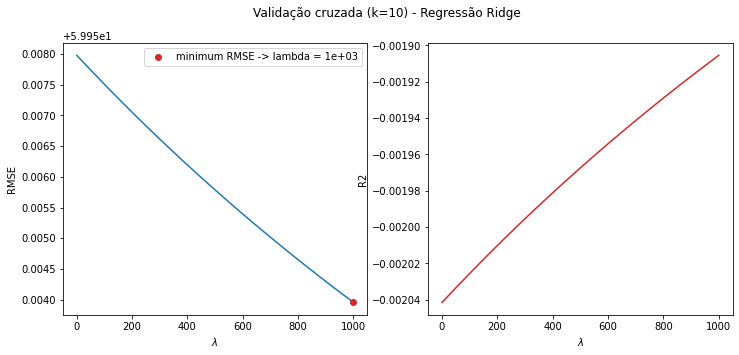

In [ ]:
# Representação da validação cruzada e ponto mínimo:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
plt.suptitle('Validação cruzada (k=10) - Regressão Ridge')
ax[0].plot(hiperparametro_lambda, modelo_ridge_cv_rmse,'C0-') # rmse
ax[0].set_xlabel('$\lambda$')
ax[0].set_ylabel('RMSE')
ax[0].plot(hiperparametro_lambda[np.argmin(modelo_ridge_cv_rmse)], np.min(modelo_ridge_cv_rmse), 'C3o', label=f'minimum RMSE -> lambda = {hiperparametro_lambda[np.argmin(modelo_ridge_cv_rmse)]:.4}') # minimum rmse point
ax[0].legend()
ax[1].plot(hiperparametro_lambda, modelo_ridge_cv_r2,'C3-') # r2
ax[1].set_xlabel('$\lambda$')
ax[1].set_ylabel('R2')
plt.savefig('CV_ridgelambda.pdf')

## Tarefa 3 - Regressão Linear com Redução de Dimensionalidade (PLS e PCR)

### Curva representativa da informação por número de componente principais (PCA)

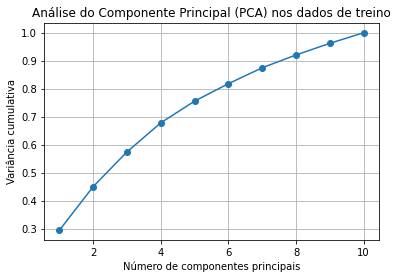

In [ ]:
# Análise do componente principal (PCA) nos dados de treino:
pca = PCA(n_components=10) 
pca.fit(x_treino)
plt.figure()
plt.title('Análise do Componente Principal (PCA) nos dados de treino')
plt.xlabel('Número de componentes principais')
plt.ylabel('Variância cumulativa')
plt.plot(np.arange(10)+1, np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.grid()
plt.savefig('pca.pdf')

### PCR - Treinando o modelo

In [ ]:
# Regressão utilizando 6 componentes principais:
pca = PCA(n_components=6) # Componentes da Análise dos Componentes Principais (PCA)

# Dimininuição de dimensionalidade do conjunto original de variáveis independentes para treino:
pca_x_treino = pca.fit_transform(x_treino)

# Define o modelo de regressão linear:
modelo_pcr = linear_model.LinearRegression()

# Treina o modelo com os dados de treino na nova dimensão:
modelo_pcr.fit(pca_x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### PCR - Predição da saída

In [ ]:
# y_predito contém a previsão das horas de treinamento (training_hours) do nosso modelo
y_predito_pcr = modelo_pcr.predict(pca.fit_transform(x_teste))

### PCR - Avaliação do modelo

In [ ]:
# Calculo do RMSE e da pontuação R2 usando as funções do scikit-learn 
print('RMSE: ', np.sqrt(mean_squared_error(y_teste, y_predito_pcr)))
print('Medida R2: ', r2_score(y_teste, y_predito_pcr))

RMSE:  60.11026096979866
Medida R2:  -0.000164505615326771


### PLS - Treinamento do modelo

In [ ]:
# Define o modelo de regressão por Mínimos Quadrados Parciais com 6 componentes principais (Partial least squares regression - PLS regression):
modelo_pls = PLSRegression(n_components=6)

# Treina o modelo com os dados de treino na nova dimensão:
modelo_pls.fit(x_treino, y_treino)

PLSRegression(copy=True, max_iter=500, n_components=6, scale=True, tol=1e-06)

### PLS - Predição da saída

In [ ]:
# y_predito contém a previsão das horas de treinamento (training_hours) do nosso modelo
y_predito_pls = modelo_pls.predict(x_teste)

### PLS - Avaliação do modelo

In [ ]:
# Calculo do RMSE e da pontuação R2 usando as funções do scikit-learn 
print('RMSE: ', np.sqrt(mean_squared_error(y_teste, y_predito_pls)))
print('Medida R2: ', r2_score(y_teste, y_predito_pls))

RMSE:  60.121740636357345
Medida R2:  -0.0005465585692980834


## Tarefa Bonus - Regressão a partir de Redes Neurais